In [582]:
import matplotlib.pyplot as plt
import numpy as np
import time
np.random.seed(1)

# Problem 1
1: Replace the activation function with the Sigmoid function. Train the network, and compare with the original activation function. What differences did you experience? Why do you think this difference happened?

## Activation functions

In [583]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_diff(x):
    return sigmoid(x)* (1-sigmoid(x))

In [584]:
def relu(x):
    return (x > 0) * x

def relu_grad(x):
    return x > 0

## Training function

In [585]:
def nn(epochs,ws_1, ws_2, af, af_diff):
    errors =[]
    for epoch in range(epochs):     #number of training iterations, or times to change the weights of the nn
        for i in range(X.shape[0]): #for all samples in X, each streetlight
            layer_in = X[i:i+1]

            #forward pass/prediction
            layer_1 = af(layer_in.dot(ws_1))
            layer_out = layer_1.dot(ws_2)

            #calc error/distance (how far are we from goal)
            delta_2 = layer_out - y[i:i+1] # ifht ws2

            #calc the error each node in prev layer contributed
            delta_1 = delta_2.dot(ws_2.T) * af_diff(layer_1) #ifht ws1

            #update weights
            ws_2 -= lr * (layer_1.T.reshape(hidden_nodes,1).dot(delta_2)) #pred dot feilmargin_ws2
            ws_1 -= lr * (layer_in.T.reshape(X.shape[1],1).dot(delta_1)) #lay_in dot feilmargin_ws1

        if epoch % 10 == 0: # at every tenth instance
            error = delta_2**2
            errors.append(error[0][0])
    return errors

## Dataset initialization

In [586]:
streetlights = np.array([[1,0,1], 
                         [0,1,1], 
                         [0,0,1], 
                         [1,1,1], 
                         [0,1,1], 
                         [1,0,1]])

In [587]:
walk_vs_stop = np.array([[0], [1], [0], [1], [1], [0]])

In [588]:
X,y = streetlights, walk_vs_stop
hidden_nodes = 8

## Setting weights

In [589]:
ws_1 = np.random.rand(X.shape[1], hidden_nodes) - 0.5 #rand(3,8) from -0.5 to 0.5
ws_2 = np.random.rand(hidden_nodes, y.shape[1]) - 0.5 # rand(8,1)

## Adjusting parameters

In [590]:
epochs = 150  # number of iterations to go through the network
lr = 0.01      # how much we change the weights of the network each iteration

In [591]:
sigmoid_errors = nn(epochs,ws_1,ws_2,sigmoid, sigmoid_diff)

In [592]:
relu_errors = nn(epochs,ws_1,ws_2,relu, relu_grad)

## Problem 1: Sigmoid vs Relu

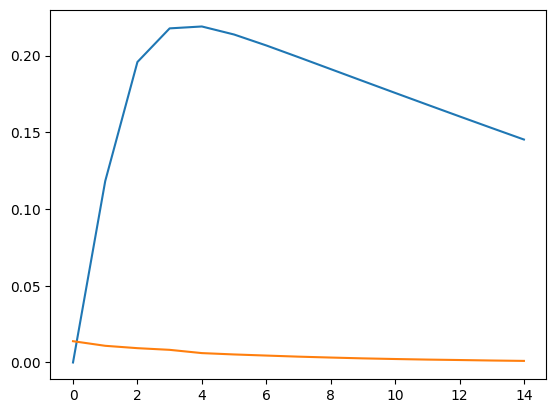

In [606]:
plt.plot(sigmoid_errors)
plt.plot(relu_errors)

In [603]:
error_comparison = np.array([sigmoid_errors,relu_errors]).T
error_comparison

array([[1.02036432e-05, 1.38842279e-02],
       [1.18241935e-01, 1.08796320e-02],
       [1.95881839e-01, 9.33893612e-03],
       [2.17797788e-01, 8.24779771e-03],
       [2.19033241e-01, 6.12350910e-03],
       [2.13802032e-01, 5.24227209e-03],
       [2.06670267e-01, 4.51785607e-03],
       [1.99016505e-01, 3.80798818e-03],
       [1.91246205e-01, 3.22342344e-03],
       [1.83476417e-01, 2.68630325e-03],
       [1.75741152e-01, 2.26519484e-03],
       [1.68052214e-01, 1.89463939e-03],
       [1.60416975e-01, 1.60813343e-03],
       [1.52843396e-01, 1.29083504e-03],
       [1.45341268e-01, 1.03574356e-03]])

Looking at the plot and the comparison table we can see that although the sigmoid-errors start of pretty low they quickly ramp up, before descending again.
The relu-errors on the other hand have a more or less steady descent and are at all times much lower than the sigmoid-errors.

The low and steady errors from the relu activation function seems to suggest that it is a lot more capable activation function compare to the sigmoid function.

